# Applying the SIR-Model to the Corona virus SARS-CoV-2

The virus SARS-CoV-2 is currently spreading around the word. Assuming that recovered people cannot be infected again (this is currently believed by experts) the most simple model to compute the dynamics of infections by this virus is the SIR-model. 

We try to estimate the percentage of infected people in Germany based on the following assumptions:
1. No actions are taken against the spread of the virus. 
2. The total number of people in Germany is constant (i.e. no death rates and migration rates). 
3. Any person in Germany is susceptible to the virus except those who have recovered. 
4. The spread of the virus in Germany originated from a single person. 
5. The infection and recovery rates are constant throughout the epidemy. 

Clearly, all those assumptions have only very limited application or go along with uncertainties. In particular, Germany has taken actions by now. Therefore, the following can probably be seen as the worst case. 
Also, note that a small fraction of infection people will die due to the virus. Effectively, they are counted to the recovered people to make things as simple as possible. This simplification obviously does not affect the spread of the virus as long as recovered people cannot be infected again. 

At the end of this notebook we use the SIR-model to argue that preventive measures must be initiated as soon as possible to delay the peak of maximal infection. Two weeks delay results in a loss of one month preparation time.

### Rates of infection and recovery

An infected person seems to recover after 14 days and, from then on, is no longer able to infect other people. The recovery rate is therefore chosen to be $\gamma = 1/14 \simeq 0.072$ (per day). Of course, this is not quite accurate but good enough for our purpose. Technically, one has to modify the third SIR-equation by defining $\Delta R(t)=I(t-14)$. 

The infection rate is estimated by trial and error. A very first estimate is as follows. If every day $15\%$ of the population is infected then the infection rate normalised by the size of the German population is 
$$\begin{align*}
\beta = \frac{0.15}{80 \cdot 10^6} = 1.9 \cdot 10^{-9} \ . 
\end{align*}
$$
But in this case we would get $I(40) \simeq 25$ infected people, which is far less than the official number of approximately $3.500$ infected people. The reason is that the recovery rate invalidates this estimate already at the beginning of the epidemy. The choice of $\beta = 3.45 \cdot 10^{-9}$ (per day and person) yields $I(40)=3469$ which seems more accurate as of 13 March 2020. Here we make an additional assumption: we assume that the number of undetected cases is negligible. (This is possibly supported by the small case fatality rate in Germany of less than $0.5\%$.) This does not mean that the undetected cases have been ignored for $t<40$. Indeed, $R(40)=1224$ which is far bigger than the 46 recoverd people that have been reported. 

To summarise, we assume in the following that 
$$\begin{align*}
\beta  = 3.45 \cdot 10^{-9} \ , \qquad \gamma = 0.072 \ . 
\end{align*}
$$

### Numerical implementation

We normalise $S, I$ and $R$ by the total size of the population. The model in Python looks as follows:

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Constants 
beta = 3.45e-9
gamma = 0.072

# Population 
N = 80e6 
infected = 1.25e-8 # share of initially infected people 
I = N * infected
S = N - I # R=0
R = N - S - I 

# The input of this function is S, I and R as well as beta and gamma, and the end of computation. The output should be a list of susceptible, infected and recovered 
# population at any (discrete) instant in time. 
def SIR_model(susceptible, infectious, recovered, beta, gamma, start, end):
    S = susceptible
    I = infectious
    R = recovered
    t = start # starting point 
    dt = 1/100 # size of time steps
    T = end # end day of computation 
    N = S + I + R
    
    # definition of lists for the purpose of plotting
    S_list = [S/N]
    I_list = [I/N]
    R_list = [R/N]
    time = [t]
    
    # implementing the system of differential equations
    while t < T:
        # updating S, I and R taking into account invariance of N
        S, I, R = max(S - beta*S*I*dt,0), max(I + (beta*S*I - gamma*I)*dt,0), max(R + gamma*I*dt,0) 
        t = t + dt
        
        S_list.append(S/N)
        I_list.append(I/N)
        R_list.append(R/N)
        time.append(t)
        
    return S_list, I_list, R_list, time, dt

### Results

We plot the percentage of suceptible, infected and recovered population for a period of 300 days. 

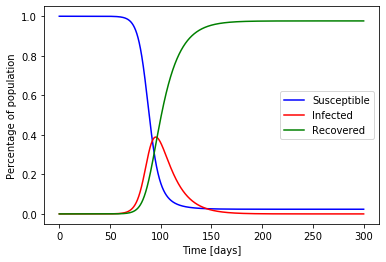

In [2]:
S_list, I_list, R_list, time, dt = SIR_model(S, I, R, beta, gamma, 0, 300)

plt.plot(time, S_list, 'b', label = 'Susceptible')
plt.plot(time, I_list, 'r', label = 'Infected')
plt.plot(time, R_list, 'g', label = 'Recovered')
plt.xlabel('Time [days]')
plt.ylabel('Percentage of population')
plt.legend()
plt.show()

The time at which the peak in the amount of infected people is reached can be computed by the following line of code:

In [3]:
print('After', round(time[I_list.index(max(I_list))-1]), 'days the point of maximal infection at a rate of', round(max(I_list)*100),'% is reached.')

After 95 days the point of maximal infection at a rate of 39 % is reached.


The 95 days are assumed to start from 01 Feburary 2020. This corresponds to 06 May 2020. More than 30 Mio people would be infected at the same time. 

Recall that these figures are based on a set of various assumptions. In particular, it is assumed that no actions are taken against the epidemy. Hence, those figures can be understood as the worst case.  

It is also interesting to plot the number of infected people within until 13.03.2020 (now): 

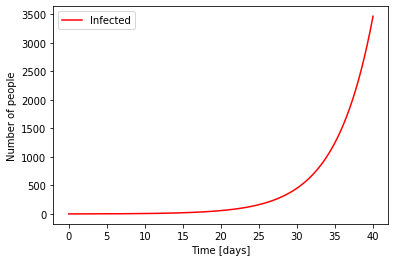

In [4]:
T = 40
I = []
t = []
i=0
while i <= T/dt:
    I.append(I_list[i]*N)
    t.append(i*dt)
    i += 1
plt.plot(t, I, 'r', label = 'Infected')
plt.xlabel('Time [days]')
plt.ylabel('Number of people')
plt.legend()

What is the day at which we expect to reach $10.000$ infected people? By simply extending the days in the previous lines of code one obtains that on 18 March 2020 Germany reaches $10.000$ infected people.  

### What are the effects of preventive measures?

This is obviously a hard question which cannot be answered accurately without elaborate models. To get a rough idea we repeat the computation from above setting the initial conditions to the values from 13 March 2020 and reducing $\beta$ by a factor of 2. 

In [1]:
# Constants 
beta = 3.45e-9/2 # reduction of infectipn rate due to preventive measures
gamma = 0.072

# Population 
I = 3469 # number of infected people on 13 March 2020
R = 1224 # number of recovered people on 13 March 2020 (deviating from measurement!)
S = N - I - R

NameError: name 'N' is not defined

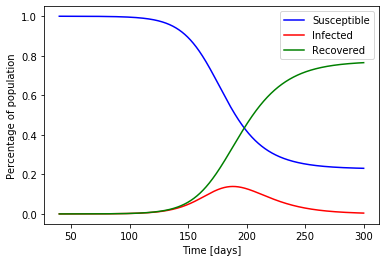

In [6]:
S_list, I_list, R_list, time, dt = SIR_model(S, I, R, beta, gamma, 40, 300)

plt.plot(time, S_list, 'b', label = 'Susceptible')
plt.plot(time, I_list, 'r', label = 'Infected')
plt.plot(time, R_list, 'g', label = 'Recovered')
plt.xlabel('Time [days]')
plt.ylabel('Percentage of population')
plt.legend()

In [7]:
print('After', round(time[I_list.index(max(I_list))-1]), 'days the point of maximal infection at a rate of', round(max(I_list)*100),'% is reached.')

After 188 days the point of maximal infection at a rate of 14 % is reached.


The maximum peak of infections is shifted to 07 August 2020 at which about 11 Mio people are infected. 

What happens if we start the preventive measures only one week later?

In [8]:
# Population 
I = 14442 # predicted number of infected people on 20 March 2020
R = 5098 # predicted number of recovered people on 20 March 2020 
S = N - I - R

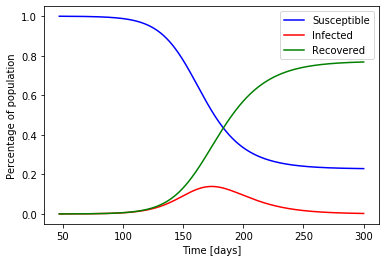

In [9]:
S_list, I_list, R_list, time, dt = SIR_model(S, I, R, beta, gamma, 47, 300)

plt.plot(time, S_list, 'b', label = 'Susceptible')
plt.plot(time, I_list, 'r', label = 'Infected')
plt.plot(time, R_list, 'g', label = 'Recovered')
plt.xlabel('Time [days]')
plt.ylabel('Percentage of population')
plt.legend()

In [10]:
print('After', round(time[I_list.index(max(I_list))-1]), 'days the point of maximal infection at a rate of', round(max(I_list)*100),'% is reached.')

After 174 days the point of maximal infection at a rate of 14 % is reached.


Hence, starting the preventive measues only one week later leads to a loss of two weeks to prepare for the moment of maximal infections. 

Let's delay the beginning of the preventive measures by 14 days. 

In [11]:
# Population 
I = 60078 # predicted number of infected people on 27 March 2020
R = 21218 # predicted number of recovered people on 27 March 2020 
S = N - I - R

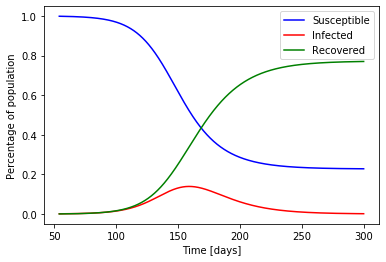

In [12]:
S_list, I_list, R_list, time, dt = SIR_model(S, I, R, beta, gamma, 54, 300)

plt.plot(time, S_list, 'b', label = 'Susceptible')
plt.plot(time, I_list, 'r', label = 'Infected')
plt.plot(time, R_list, 'g', label = 'Recovered')
plt.xlabel('Time [days]')
plt.ylabel('Percentage of population')
plt.legend()

In [13]:
print('After', round(time[I_list.index(max(I_list))-1]), 'days the point of maximal infection at a rate of', round(max(I_list)*100),'% is reached.')

After 159 days the point of maximal infection at a rate of 14 % is reached.


This is a loss of about one month in preparation time. This simple simulation proves that preventive measures must be introduced as soon as possible to contain the spread of the virus. 